# 1. Import required libraries and read the dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
data = pd.read_csv("Apps_data+(1).csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [50]:
data.copy()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [51]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [53]:
data.shape

(10841, 13)

In [54]:
data.ndim

2

In [55]:
data.size

140933

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [57]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [58]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [59]:
columns = data.columns
print("Columns in the data set:",columns)

Columns in the data set: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [60]:
x = data.duplicated().sum()
x

483

In [61]:
x = data.drop_duplicates()
x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [62]:
unique_categories = x["Category"].unique()
print(f"Unique categories in the {'Category'} column:",unique_categories)

Unique categories in the Category column: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [63]:
x['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [64]:
drop_invalid_category = x['Category']!=1.9
x = x[drop_invalid_category]

In [65]:
invalid_mask = x.isnull().any(axis=1)
x = x[~invalid_mask]

In [66]:
x['Category'].value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [67]:
missing_values = x['Rating'].isnull().sum()
print("Missing values in the column Rating:",missing_values)

Missing values in the column Rating: 0


In [68]:
x = x.dropna(subset=['Rating'])

In [69]:
x['Rating_category'] = x['Rating'].apply(lambda x: 'High' if x>3.5 else 'Low')
x['Rating_category']
x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [70]:
distribution_of_RC = x['Rating_category'].value_counts()
print(f"Distribution of {'Rating_category'} is:",distribution_of_RC)

Distribution of Rating_category is: High    8007
Low      879
Name: Rating_category, dtype: int64


# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [71]:
x['Reviews'].value_counts()

2          82
3          76
4          74
5          74
1          67
           ..
55427       1
3157936     1
527247      1
240475      1
398307      1
Name: Reviews, Length: 5990, dtype: int64

In [72]:
x['Reviews'] = pd.to_numeric(x['Reviews'], errors='coerce')
x['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8886, dtype: int64

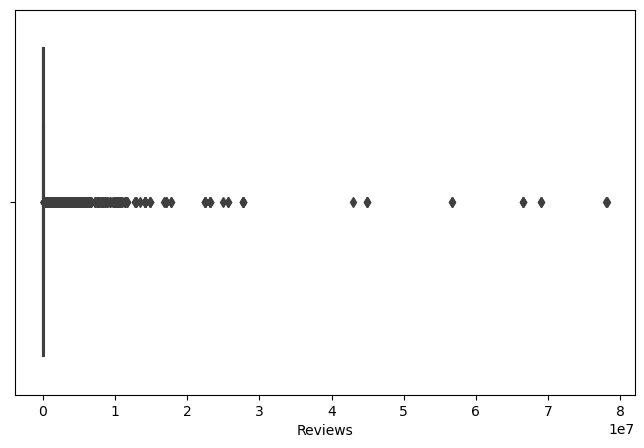

In [73]:
#checking for the presence of outliers in the column reviews
plt.figure(figsize=(8,5))
sns.boxplot(x=x["Reviews"])
plt.show()

In [74]:
Q1 = x['Reviews'].quantile(0.25)
Q3 = x['Reviews'].quantile(0.75)
IQR = Q3 - Q1

IQR_threshold = 1.5

lower = x['Reviews'] < (Q1 - IQR_threshold * IQR)
higher = x['Reviews'] > (Q3 + IQR_threshold * IQR)


x.loc[lower, 'Reviews'] = np.log1p(x.loc[lower, 'Reviews'])
x.loc[higher, 'Reviews'] = np.log1p(x.loc[higher, 'Reviews'])

outliers = x[lower | higher]

if outliers.empty:
    print('No outliers found')
else:
    print("Outliers found:",len(outliers))

Outliers found: 1555


In [75]:
x['Reviews'] = np.log1p(x['Reviews']) 
x['Reviews'].head(10)

0     5.075174
1     6.875232
2    11.379520
3     2.586364
4     6.875232
5     5.123964
6     5.187386
7    10.513688
8     9.531844
9     4.804021
Name: Reviews, dtype: float64

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [76]:
x['Size'] = x['Size'].replace({'M':'1e6','K':'1e3','Varies with device':'NaN'},regex=True)
x['Size'] = pd.to_numeric(x['Size'],errors='coerce')

x=x.dropna(subset = ['Size'])
x['Size'].head()

0    191000000.0
1    141000000.0
2      8710000.0
3    251000000.0
4      2810000.0
Name: Size, dtype: float64

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [77]:
x['Installs'].unique() #checking for the unwanted characters 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [78]:
x['Installs'] = x['Installs'].str.replace('[+,]','',regex = True)
x['Installs'].head()

C:\Users\Rajeshwari\AppData\Local\Temp\ipykernel_28956\1540639103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Installs'] = x['Installs'].str.replace('[+,]','',regex = True)


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [79]:
x['Installs'].astype(int) #converting it to int data type

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10830      100000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7162, dtype: int32

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [80]:
x['Price'].unique() #checking for unwanted characters

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$7.49',
       '$1.50', '$19.99', '$15.99', '$33.99', '$39.99', '$2.49', '$4.49',
       '$1.70', '$1.49', '$3.88', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99',
       '$4.29', '$3.28', '$4.60', '$1.00', '$10.99', '$2.90', '$1.97',
       '$2.56', '$1.20'], dtype=object)

In [81]:
x['Price'] = x['Price'].str.replace('[$]','',regex = True)
x['Price'].head()

C:\Users\Rajeshwari\AppData\Local\Temp\ipykernel_28956\1073079134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Price'] = x['Price'].str.replace('[$]','',regex = True)


0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [82]:
x['Price'].astype(float) #converting it into float data type

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10830    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7162, dtype: float64

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [83]:
dropping_columns = ['App','Rating','Genres','Last Updated','Current Ver','Android Ver']
x =x.drop(columns = dropping_columns)
x.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,191000000.0,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,6.875232,141000000.0,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,11.379520,8710000.0,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,2.586364,251000000.0,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,6.875232,2810000.0,100000,Free,0,Everyone,High


# 13. Encode the categorical columns.

In [84]:
x['Category'].value_counts()

FAMILY                 1568
GAME                    956
TOOLS                   563
LIFESTYLE               265
MEDICAL                 264
FINANCE                 257
PERSONALIZATION         253
SPORTS                  231
PHOTOGRAPHY             223
BUSINESS                217
PRODUCTIVITY            214
HEALTH_AND_FITNESS      196
COMMUNICATION           181
SOCIAL                  168
NEWS_AND_MAGAZINES      160
SHOPPING                153
TRAVEL_AND_LOCAL        146
DATING                  141
BOOKS_AND_REFERENCE     140
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      93
EDUCATION                93
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        62
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   37
BEAUTY                   37
LIBRARIES_AND_DEMO       34
Name: Category, dtype: int64

In [85]:
x['Content Rating'].value_counts()

Everyone           5704
Teen                826
Mature 17+          331
Everyone 10+        298
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [86]:
x['Rating_category'].value_counts()

High    6381
Low      781
Name: Rating_category, dtype: int64

In [87]:
x['Type'].value_counts()

Free    6667
Paid     495
Name: Type, dtype: int64

In [88]:
x = pd.get_dummies(x,columns = ['Category'],prefix = 'Category')

In [89]:
label_encoder = LabelEncoder()
x['Type'] = label_encoder.fit_transform(x['Type'])
x['Content_Rating'] = label_encoder.fit_transform(x['Content Rating'])
x['Rating_category'] = label_encoder.fit_transform(x['Rating_category'])

In [90]:
x

,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating
0,5.075174,191000000.0,10000,0,0,Everyone,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6.875232,141000000.0,500000,0,0,Everyone,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11.379520,8710000.0,5000000,0,0,Everyone,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.586364,251000000.0,50000000,0,0,Teen,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
4,6.875232,2810000.0,100000,0,0,Everyone,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.782192,2310000.0,100000,0,0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10834,2.079442,2610000.0,500,0,0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10836,3.663562,531000000.0,5000,0,0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10837,1.609438,3610000.0,100,0,0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [91]:
X = x.drop("Rating_category", axis=1)  
y = x["Rating_category"]  